In [1]:
import os
os.chdir('/Users/zhanwenxin/Documents/GitHub/cuTAGI')

import scipy.io as sio
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
from datetime import datetime
import numpy as np

from src.RL_functions.generate_one_synthetic_time_series import generate_datetime_values


### Datasets overview

In [2]:
# Load the real time series
time_series_path = './data/HQ/CASC_LGA007EFAPRG910_2024_07.mat'
real_data = sio.loadmat(time_series_path)
real_timestamps = real_data['values'][:, 1][0].T[0][540:]
real_obs = real_data['values'][:, 2][0].T[0][540:].tolist()
real_datetime = generate_datetime_values(start_datetime=datetime(2012, 1, 15, 12, 0, 0), num_values=len(real_obs), time_step_interval=7)
datasets_splits = [216, 268, -1]

# Load synthetic time series
syn_observation_save_path='data/CASC_LGA007EFAPRG910_2024_07/RLDS_y_observation_1000episodes_mixed.csv'
# Remove the first row in pandas dataframe
syn_obs = pd.read_csv(syn_observation_save_path, skiprows=0, delimiter=",", header=None)
syn_datetime = generate_datetime_values(start_datetime=datetime(2016, 9, 11, 12, 0, 0), num_values=len(syn_obs), time_step_interval=7)

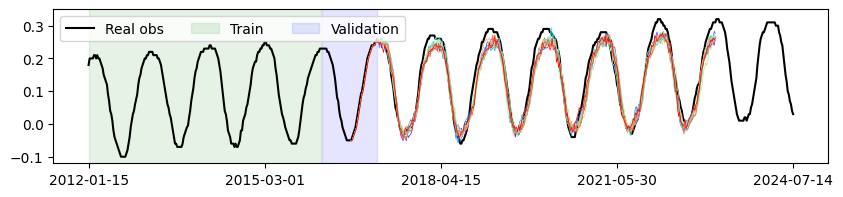

In [15]:
# Plot the real time series
fig = plt.figure(figsize=(10, 2))
plt.plot(real_datetime, real_obs, 'k', label='Real obs')
# Shaded the area between -0.2 and 0.4 for the x range until real_datetime[datasets_splits[0]]
plt.fill_between(real_datetime[:datasets_splits[0]], -0.2, 0.4, color='green', alpha=0.1, label='Train')
plt.fill_between(real_datetime[datasets_splits[0]:datasets_splits[1]], -0.2, 0.4, color='blue', alpha=0.1, label='Validation')

# COLORS = plt.cm.get_cmap('rainbow', 10)
COLORS = plt.colormaps['rainbow'].resampled(10)
for i in range(10):
    plt.plot(syn_datetime, syn_obs[i].tolist(), color = COLORS(i), linewidth=0.5)

plt.legend(loc='upper left', ncol=3)
plt.ylim(-0.12, 0.35)
plt.xticks([real_datetime[0], real_datetime[int(len(real_datetime)/4)], real_datetime[int(len(real_datetime)/2)], real_datetime[int(len(real_datetime)*3/4)], real_datetime[-1]])
plt.gca().set_xticklabels([str(real_datetime[0])[0:10], str(real_datetime[int(len(real_datetime)/4)])[0:10], str(real_datetime[int(len(real_datetime)/2)])[0:10], str(real_datetime[int(len(real_datetime)*3/4)])[0:10], str(real_datetime[-1])[0:10]]);

In [16]:
print(len(syn_datetime))

338


### Collect samples using the synthetic time series

In [ ]:
# TODO